<a href="https://colab.research.google.com/github/sheikh495/database/blob/main/SQL_Basics_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd

# Step 1: Create a connection to SQLite in memory
connection = sqlite3.connect(':memory:')  # In-memory database for temporary use
cursor = connection.cursor()

# Step 2: Create the Books table
cursor.execute('''
CREATE TABLE Books (
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title TEXT NOT NULL,
    Author TEXT NOT NULL,
    Genre TEXT NOT NULL,
    PublishedYear INTEGER CHECK (PublishedYear >= 1000 AND PublishedYear <= 2024) NOT NULL,
    Price REAL NOT NULL,
    ISBN TEXT UNIQUE
);
''')

# Step 3: Insert data into the Books table
cursor.executemany('''
INSERT INTO Books (Title, Author, Genre, PublishedYear, Price, ISBN) VALUES (?, ?, ?, ?, ?, ?);
''', [
    ('To Kill a Mockingbird', 'Harper Lee', 'Fiction', 1960, 10.99, None),
    ('1984', 'George Orwell', 'Dystopian', 1949, 8.99, '9780451524935'),
    ('The Great Gatsby', 'F. Scott Fitzgerald', 'Classic', 1925, 12.50, '9780743273565'),
    ('The Catcher in the Rye', 'J.D. Salinger', 'Classic', 1951, 7.99, None),
    ('Pride and Prejudice', 'Jane Austen', 'Romance', 1813, 9.99, '9780141439518')
])

# Commit the changes
connection.commit()

# Function to run a query and display results in a pandas DataFrame
def run_query(query):
    df = pd.read_sql_query(query, connection)
    return df

# Part 2: Query database

# 1. Retrieve all records
print("1. Retrieve All Records:")
print(run_query("SELECT * FROM Books"))

# 2. List distinct genres
print("\n2. List Distinct Genres:")
print(run_query("SELECT DISTINCT Genre FROM Books"))

# 3. Filter by price (less than $10)
print("\n3. Filter by Price (less than $10):")
print(run_query("SELECT * FROM Books WHERE Price < 10"))

# 4. Order by published year
print("\n4. Order by Published Year (Ascending):")
print(run_query("SELECT * FROM Books ORDER BY PublishedYear ASC"))

# 5. Filter with multiple conditions
print("\n5. Filter with Multiple Conditions:")
print(run_query('''
SELECT * FROM Books
WHERE (Genre = 'Classic' OR Price BETWEEN 8.00 AND 12.00)
AND PublishedYear >= 1950
'''))

# 6. Find books with NULL ISBNs
print("\n6. Find Books with NULL ISBNs:")
print(run_query("SELECT * FROM Books WHERE ISBN IS NULL"))

# 7. Use of IN clause
print("\n7. Books by 'Harper Lee' or 'George Orwell':")
print(run_query("SELECT * FROM Books WHERE Author IN ('Harper Lee', 'George Orwell')"))

# 8. Apply an Alias (Price as Cost)
print("\n8. Book Titles with Price (as Cost):")
print(run_query("SELECT Title, Price AS Cost FROM Books"))

# Close the connection
connection.close()


1. Retrieve All Records:
   BookID                   Title               Author      Genre  \
0       1   To Kill a Mockingbird           Harper Lee    Fiction   
1       2                    1984        George Orwell  Dystopian   
2       3        The Great Gatsby  F. Scott Fitzgerald    Classic   
3       4  The Catcher in the Rye        J.D. Salinger    Classic   
4       5     Pride and Prejudice          Jane Austen    Romance   

   PublishedYear  Price           ISBN  
0           1960  10.99           None  
1           1949   8.99  9780451524935  
2           1925  12.50  9780743273565  
3           1951   7.99           None  
4           1813   9.99  9780141439518  

2. List Distinct Genres:
       Genre
0    Fiction
1  Dystopian
2    Classic
3    Romance

3. Filter by Price (less than $10):
   BookID                   Title         Author      Genre  PublishedYear  \
0       2                    1984  George Orwell  Dystopian           1949   
1       4  The Catcher in the 

1. Retrieve All Records:


,BookID,Title,Author,Genre,PublishedYear,Price,ISBN
0,1,To Kill a Mockingbird,Harper Lee,Fiction,1960,10.99,None
1,2,1984,George Orwell,Dystopian,1949,8.99,9780451524935
2,3,The Great Gatsby,F. Scott Fitzgerald,Classic,1925,12.50,9780743273565
3,4,The Catcher in the Rye,J.D. Salinger,Classic,1951,7.99,None
4,5,Pride and Prejudice,Jane Austen,Romance,1813,9.99,9780141439518



2. List Distinct Genres:


,Genre
0,Fiction
1,Dystopian
2,Classic
3,Romance


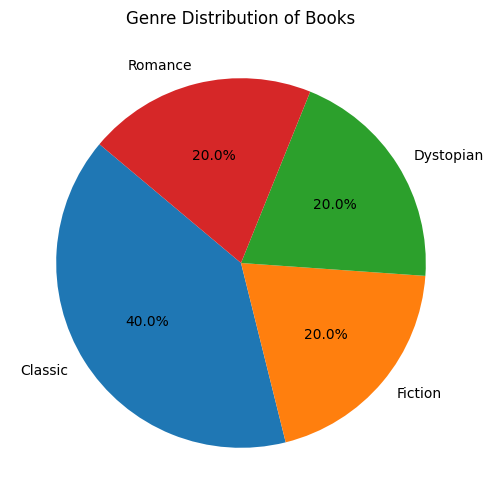


3. Filter by Price (less than $10):


,BookID,Title,Author,Genre,PublishedYear,Price,ISBN
0,2,1984,George Orwell,Dystopian,1949,8.99,9780451524935
1,4,The Catcher in the Rye,J.D. Salinger,Classic,1951,7.99,None
2,5,Pride and Prejudice,Jane Austen,Romance,1813,9.99,9780141439518



4. Order by Published Year (Ascending):


,BookID,Title,Author,Genre,PublishedYear,Price,ISBN
0,5,Pride and Prejudice,Jane Austen,Romance,1813,9.99,9780141439518
1,3,The Great Gatsby,F. Scott Fitzgerald,Classic,1925,12.50,9780743273565
2,2,1984,George Orwell,Dystopian,1949,8.99,9780451524935
3,4,The Catcher in the Rye,J.D. Salinger,Classic,1951,7.99,None
4,1,To Kill a Mockingbird,Harper Lee,Fiction,1960,10.99,None


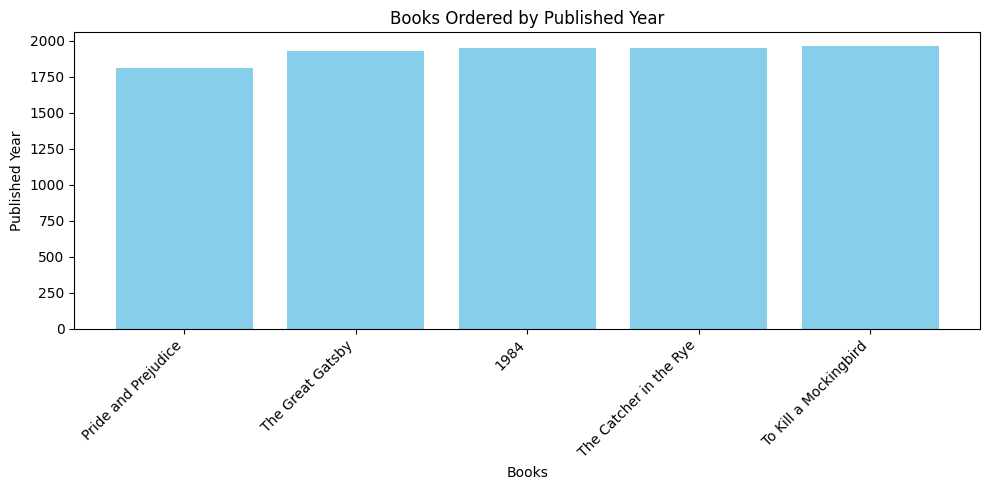


5. Filter with Multiple Conditions:


,BookID,Title,Author,Genre,PublishedYear,Price,ISBN
0,1,To Kill a Mockingbird,Harper Lee,Fiction,1960,10.99,None
1,4,The Catcher in the Rye,J.D. Salinger,Classic,1951,7.99,None



6. Find Books with NULL ISBNs:


,BookID,Title,Author,Genre,PublishedYear,Price,ISBN
0,1,To Kill a Mockingbird,Harper Lee,Fiction,1960,10.99,None
1,4,The Catcher in the Rye,J.D. Salinger,Classic,1951,7.99,None



7. Books by 'Harper Lee' or 'George Orwell':


,BookID,Title,Author,Genre,PublishedYear,Price,ISBN
0,1,To Kill a Mockingbird,Harper Lee,Fiction,1960,10.99,None
1,2,1984,George Orwell,Dystopian,1949,8.99,9780451524935



8. Book Titles with Price (as Cost):


,Title,Cost
0,To Kill a Mockingbird,10.99
1,1984,8.99
2,The Great Gatsby,12.50
3,The Catcher in the Rye,7.99
4,Pride and Prejudice,9.99


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a connection to SQLite in memory
connection = sqlite3.connect(':memory:')  # In-memory database for temporary use
cursor = connection.cursor()

# Step 2: Create the Books table
cursor.execute('''
CREATE TABLE Books (
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title TEXT NOT NULL,
    Author TEXT NOT NULL,
    Genre TEXT NOT NULL,
    PublishedYear INTEGER CHECK (PublishedYear >= 1000 AND PublishedYear <= 2024) NOT NULL,
    Price REAL NOT NULL,
    ISBN TEXT UNIQUE
);
''')

# Step 3: Insert data into the Books table
cursor.executemany('''
INSERT INTO Books (Title, Author, Genre, PublishedYear, Price, ISBN) VALUES (?, ?, ?, ?, ?, ?);
''', [
    ('To Kill a Mockingbird', 'Harper Lee', 'Fiction', 1960, 10.99, None),
    ('1984', 'George Orwell', 'Dystopian', 1949, 8.99, '9780451524935'),
    ('The Great Gatsby', 'F. Scott Fitzgerald', 'Classic', 1925, 12.50, '9780743273565'),
    ('The Catcher in the Rye', 'J.D. Salinger', 'Classic', 1951, 7.99, None),
    ('Pride and Prejudice', 'Jane Austen', 'Romance', 1813, 9.99, '9780141439518')
])

# Commit the changes
connection.commit()

# Function to run a query and return a DataFrame
def run_query(query):
    return pd.read_sql_query(query, connection)

# Part 2: Query database and visualize

# 1. Retrieve all records
print("1. Retrieve All Records:")
all_records = run_query("SELECT * FROM Books")
display(all_records)

# 2. List distinct genres
print("\n2. List Distinct Genres:")
distinct_genres = run_query("SELECT DISTINCT Genre FROM Books")
display(distinct_genres)

# Visualize genres as a pie chart
genre_count = all_records['Genre'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution of Books')
plt.show()

# 3. Filter by price (less than $10)
print("\n3. Filter by Price (less than $10):")
price_filter = run_query("SELECT * FROM Books WHERE Price < 10")
display(price_filter)

# 4. Order by published year
print("\n4. Order by Published Year (Ascending):")
ordered_by_year = run_query("SELECT * FROM Books ORDER BY PublishedYear ASC")
display(ordered_by_year)

# Visualize published years as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(ordered_by_year['Title'], ordered_by_year['PublishedYear'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Books')
plt.ylabel('Published Year')
plt.title('Books Ordered by Published Year')
plt.tight_layout()
plt.show()

# 5. Filter with multiple conditions
print("\n5. Filter with Multiple Conditions:")
filtered_books = run_query('''
SELECT * FROM Books
WHERE (Genre = 'Classic' OR Price BETWEEN 8.00 AND 12.00)
AND PublishedYear >= 1950
''')
display(filtered_books)

# 6. Find books with NULL ISBNs
print("\n6. Find Books with NULL ISBNs:")
null_isbn_books = run_query("SELECT * FROM Books WHERE ISBN IS NULL")
display(null_isbn_books)

# 7. Use of IN clause
print("\n7. Books by 'Harper Lee' or 'George Orwell':")
author_filter = run_query("SELECT * FROM Books WHERE Author IN ('Harper Lee', 'George Orwell')")
display(author_filter)

# 8. Apply an Alias (Price as Cost)
print("\n8. Book Titles with Price (as Cost):")
alias_query = run_query("SELECT Title, Price AS Cost FROM Books")
display(alias_query)

# Close the connection
connection.close()


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

# Step 1: Create a connection to SQLite in memory
connection = sqlite3.connect(':memory:')  # In-memory database for temporary use
cursor = connection.cursor()

# Step 2: Create the Books table
cursor.execute('''
CREATE TABLE Books (
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title TEXT NOT NULL,
    Author TEXT NOT NULL,
    Genre TEXT NOT NULL,
    PublishedYear INTEGER CHECK (PublishedYear >= 1000 AND PublishedYear <= 2024) NOT NULL,
    Price REAL NOT NULL,
    ISBN TEXT UNIQUE
);
''')

# Step 3: Insert data into the Books table
cursor.executemany('''
INSERT INTO Books (Title, Author, Genre, PublishedYear, Price, ISBN) VALUES (?, ?, ?, ?, ?, ?);
''', [
    ('To Kill a Mockingbird', 'Harper Lee', 'Fiction', 1960, 10.99, None),
    ('1984', 'George Orwell', 'Dystopian', 1949, 8.99, '9780451524935'),
    ('The Great Gatsby', 'F. Scott Fitzgerald', 'Classic', 1925, 12.50, '9780743273565'),
    ('The Catcher in the Rye', 'J.D. Salinger', 'Classic', 1951, 7.99, None),
    ('Pride and Prejudice', 'Jane Austen', 'Romance', 1813, 9.99, '9780141439518')
])

# Commit the changes
connection.commit()

# Function to run a query and return a DataFrame
def run_query(query):
    return pd.read_sql_query(query, connection)

# Create a function to convert matplotlib plot to HTML image
def plot_to_html(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode()
    return f'<img src="data:image/png;base64,{img_str}"/>'

# Create HTML report
html_report = '''
<!DOCTYPE html>
<html>
<head>
    <title>Books Database Report</title>
    <style>
        body { font-family: Arial, sans-serif; }
        table { width: 100%; border-collapse: collapse; margin-bottom: 20px; }
        th, td { border: 1px solid #ddd; padding: 8px; }
        th { background-color: #f2f2f2; }
        h1 { color: #333; }
        h2 { color: #555; }
    </style>
</head>
<body>
    <h1>Books Database Report</h1>
'''

# Part 2: Query database and add to HTML report

# 1. Retrieve all records
html_report += '<h2>1. Retrieve All Records:</h2>'
all_records = run_query("SELECT * FROM Books")
html_report += all_records.to_html(index=False)

# 2. List distinct genres
html_report += '<h2>2. List Distinct Genres:</h2>'
distinct_genres = run_query("SELECT DISTINCT Genre FROM Books")
html_report += distinct_genres.to_html(index=False)

# Genre Distribution Pie Chart
fig, ax = plt.subplots()
genre_count = all_records['Genre'].value_counts()
ax.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Genre Distribution of Books')
html_report += '<h2>3. Genre Distribution Pie Chart:</h2>'
html_report += plot_to_html(fig)
plt.close(fig)

# 3. Filter by price (less than $10)
html_report += '<h2>4. Filter by Price (Less than $10):</h2>'
price_filter = run_query("SELECT * FROM Books WHERE Price < 10")
html_report += price_filter.to_html(index=False)

# 4. Order by published year
html_report += '<h2>5. Order by Published Year (Ascending):</h2>'
ordered_by_year = run_query("SELECT * FROM Books ORDER BY PublishedYear ASC")
html_report += ordered_by_year.to_html(index=False)

# Published Year Bar Chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(ordered_by_year['Title'], ordered_by_year['PublishedYear'], color='skyblue')
ax.set_xticklabels(ordered_by_year['Title'], rotation=45, ha='right')
ax.set_xlabel('Books')
ax.set_ylabel('Published Year')
ax.set_title('Books Ordered by Published Year')
html_report += '<h2>6. Books Ordered by Published Year Bar Chart:</h2>'
html_report += plot_to_html(fig)
plt.close(fig)

# 5. Filter with multiple conditions
html_report += '<h2>7. Filter with Multiple Conditions:</h2>'
filtered_books = run_query('''
SELECT * FROM Books
WHERE (Genre = 'Classic' OR Price BETWEEN 8.00 AND 12.00)
AND PublishedYear >= 1950
''')
html_report += filtered_books.to_html(index=False)

# 6. Find books with NULL ISBNs
html_report += '<h2>8. Find Books with NULL ISBNs:</h2>'
null_isbn_books = run_query("SELECT * FROM Books WHERE ISBN IS NULL")
html_report += null_isbn_books.to_html(index=False)

# 7. Books by specific authors
html_report += '<h2>9. Books by "Harper Lee" or "George Orwell":</h2>'
author_filter = run_query("SELECT * FROM Books WHERE Author IN ('Harper Lee', 'George Orwell')")
html_report += author_filter.to_html(index=False)

# 8. Apply Alias (Price as Cost)
html_report += '<h2>10. Book Titles with Price (as Cost):</h2>'
alias_query = run_query("SELECT Title, Price AS Cost FROM Books")
html_report += alias_query.to_html(index=False)

# Close HTML report
html_report += '''
</body>
</html>
'''

# Save HTML report to file
with open('/content/Books_Database_Report.html', 'w') as f:
    f.write(html_report)

print("HTML report has been generated and saved as 'Books_Database_Report.html'.")


<ipython-input-5-94e9208f942b>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ordered_by_year['Title'], rotation=45, ha='right')


HTML report has been generated and saved as 'Books_Database_Report.html'.


In [6]:
from google.colab import files
files.download('/content/Books_Database_Report.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>